In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [30]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [31]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[ 1.22779161,  1.04516401,  1.75541096, -1.09309603, -1.11989407,
        -0.50101516,  1.32523874,  0.93257672, -0.83332036,  1.80511567],
       [-0.7131111 , -0.22186639,  0.03530158,  0.56601864,  1.43829423,
         0.10600621, -0.56623406, -0.71864906, -0.40496239, -1.14416205]])

In [32]:
test_Features[:2]

array([[ 0.61951436, -0.03107377,  0.63053687, -0.83216701, -0.73259142,
         0.85033638,  1.49102506,  0.73481797, -1.04487895,  1.30028375],
       [-0.80652353, -0.54464724, -0.91288518,  0.99160097,  1.11071582,
         0.10542686, -0.43523876,  0.4580796 , -0.10093527, -1.1326004 ]])

In [33]:
train_Label[:4]

array([1, 1, 1, 1])

In [34]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [35]:
train_Features.shape

(12743, 10)

In [36]:
test_Label[:4]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [38]:
train_Features = train_Features.reshape(train_Features.shape[0], 10, 1, 1)

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(10,1,1), 
                 activation='relu'))

In [41]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [42]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [43]:
model.add(Dropout(0.25))

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(128, activation='tanh'))

In [46]:
model.add(Dropout(0.25))

In [47]:
model.add(Dense(2,activation='sigmoid'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 10, 1, 1000)       2000      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 1, 1000)       1001000   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 1, 1000)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 1, 1000)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [49]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 


In [50]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=200,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/10
10194/10194 [==============================] - 101s 10ms/step - loss: 0.1346 - acc: 0.8199 - val_loss: 0.1263 - val_acc: 0.8372
Epoch 2/10
10194/10194 [==============================] - 84s 8ms/step - loss: 0.1158 - acc: 0.8490 - val_loss: 0.1288 - val_acc: 0.8356
Epoch 3/10
10194/10194 [==============================] - 85s 8ms/step - loss: 0.1121 - acc: 0.8530 - val_loss: 0.1168 - val_acc: 0.8380
Epoch 4/10
10194/10194 [==============================] - 83s 8ms/step - loss: 0.1079 - acc: 0.8549 - val_loss: 0.1159 - val_acc: 0.8423
Epoch 5/10
10194/10194 [==============================] - 76s 7ms/step - loss: 0.1082 - acc: 0.8556 - val_loss: 0.1156 - val_acc: 0.8474
Epoch 6/10
10194/10194 [==============================] - 77s 8ms/step - loss: 0.1036 - acc: 0.8644 - val_loss: 0.1094 - val_acc: 0.8548
Epoch 7/10
10194/10194 [==============================] - 80s 8ms/step - loss: 0.1021 - acc: 0.8660 - val_loss: 0.1148 - val_ac

In [51]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

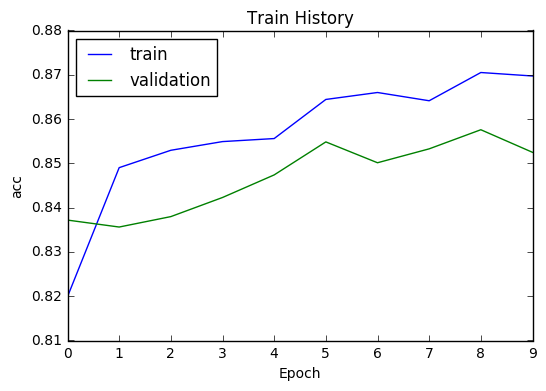

In [52]:
show_train_history(train_history,'acc','val_acc')

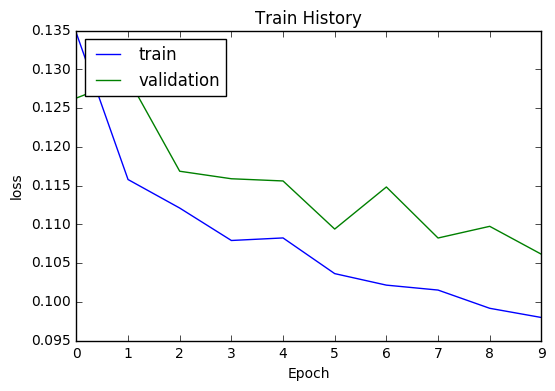

In [53]:
show_train_history(train_history,'loss','val_loss')

In [54]:
test_Features = test_Features.reshape(test_Features.shape[0], 10, 1, 1)

In [55]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 6s 948us/step


In [56]:
scores[1]

0.8655408634698104